In [2]:
pip install mne

Note: you may need to restart the kernel to use updated packages.


In [42]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import mne

In [43]:
fname = 'oddball_example_small-fif.gz'

In [44]:
raw = mne.io.read_raw_fif(fname, preload=True)

Opening raw data file oddball_example_small-fif.gz...


C:\Users\artem\AppData\Local\Temp/ipykernel_11564/67999550.py:1: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname, preload=True)


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


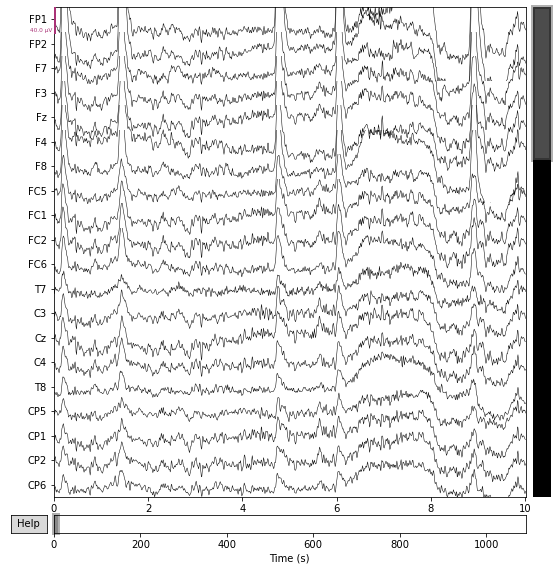

In [45]:
raw.plot();

In [46]:
raw = raw.filter(1, 20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.3s finished


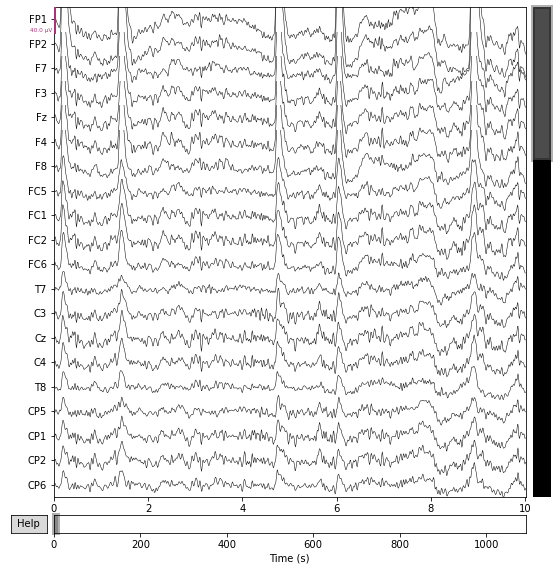

In [47]:
raw.plot();

На графиках большие всплески - это моргание глаз. С помощью метода ICA избавимся от этих всплесков.

In [48]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [49]:
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 63 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.5s finished


Selecting by number: 20 components
Fitting ICA took 6.4s.


Method,fastica
Fit,72 iterations on raw data (109098 samples)
ICA components,20
Explained variance,98.9 %
Available PCA components,63
Channel types,eeg
ICA components marked for exclusion,—


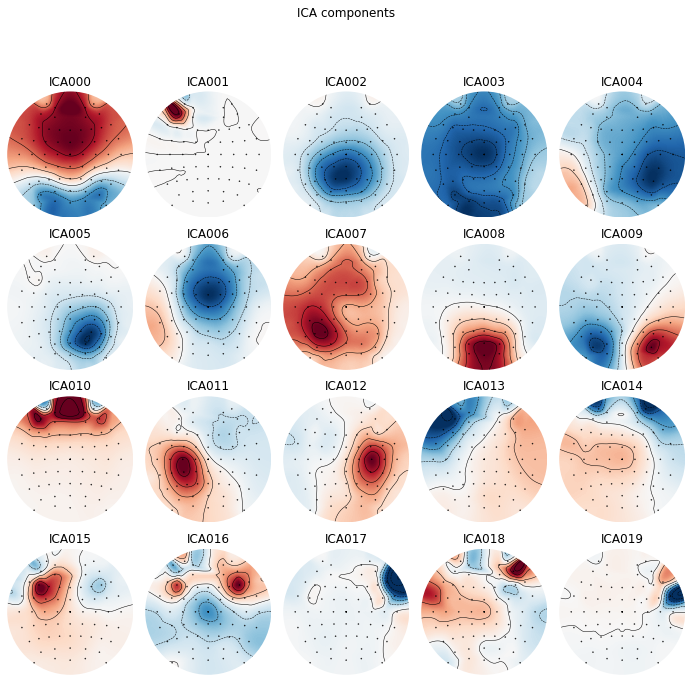

[<MNEFigure size 702x696.24 with 20 Axes>]

In [50]:
ica.plot_components(outlines='skirt')

In [51]:
ica.exclude = [1, 10, 14, 17, 18, 19]

In [52]:
bad_idx, scores = ica.find_bads_eog(raw, 'SO2', threshold=2)
print(bad_idx)

Using EOG channel: SO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[14, 10]


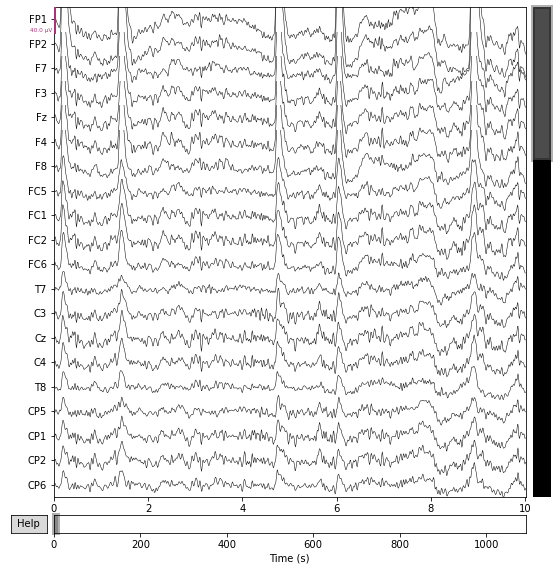

In [53]:
raw.plot();

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


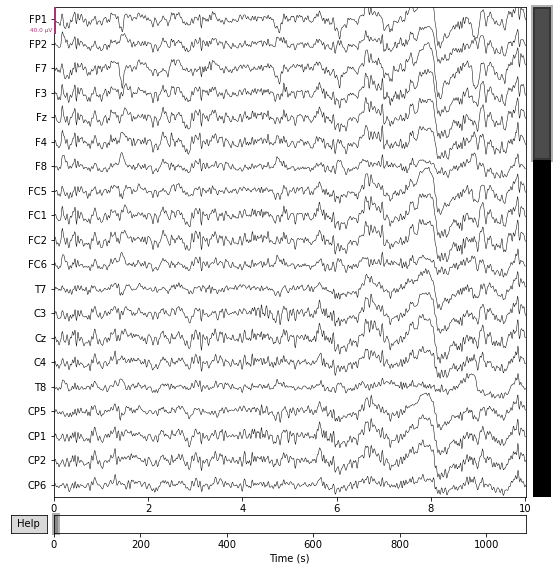

In [54]:
ica.apply(raw.copy(), exclude=ica.exclude).plot();

Как можно видеть, большие всплески из-за моргания глазами были удалены с помощью метода ICA. Обычно, это первый шаг в анализе ЭЭГ, если вам не так важно в какие моменты происходит моргание.

In [55]:
plt.rcParams['figure.figsize']=20,10

Нам нужно понять, какие события происходят на ЭЭГ. Для этого проделаем дальнейшие действия:

In [56]:
events = mne.find_events(raw)

903 events found
Event IDs: [100 200]


In [57]:
events

array([[  3241,      0,    200],
       [  3437,      0,    200],
       [  3643,      0,    200],
       ...,
       [111496,      0,    200],
       [111613,      0,    200],
       [111719,      0,    200]], dtype=int64)

Этот массив содержит метку времени в первом столбце, где произошло событие. ID события. Визуализируем события:

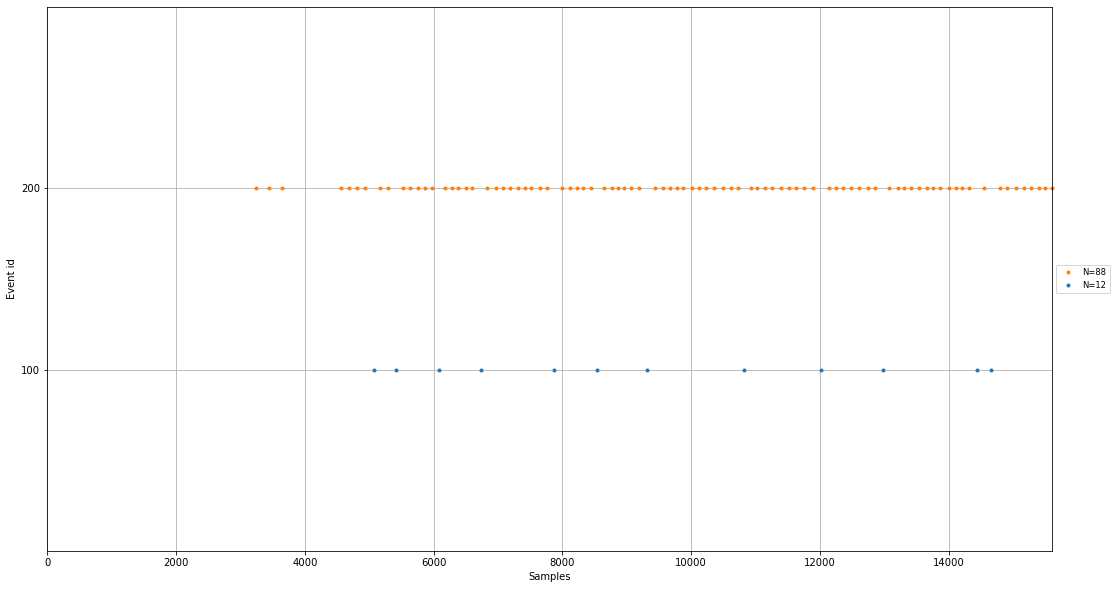

In [58]:
mne.viz.plot_events(events[:100]);

По оси Х - время, где произошло событие, по оси у - ID события. 

Разложим ЭЭГ на эпохи, в которых происходят стимуляции. Чем меньше событий происходило во времени, будем считать, что это целевые стимуляции. Фоновые стимуляции, напротив, те, которых происходило во времени больше.

In [59]:
event_ids = {'standard/stimulus': 200, 'target/stimulus': 100}

In [60]:
epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 71 original time points ...
0 bad epochs dropped


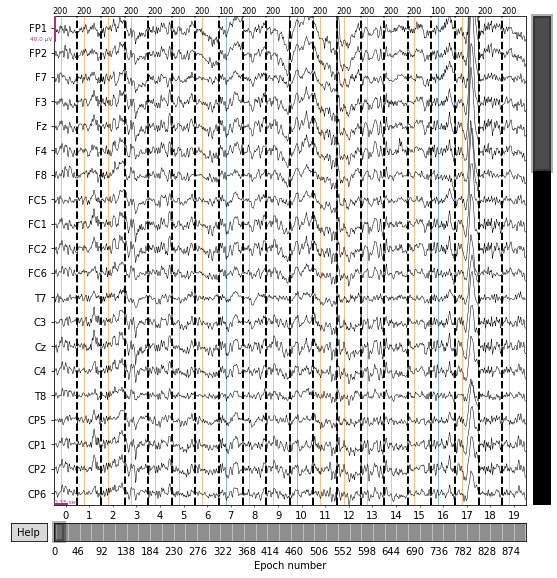

In [61]:
epochs.plot(events=events);

Применим метод ICA для фильтрации нашего ЭЭГ.

In [62]:
epochs = ica.apply(epochs, exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


C:\Users\artem\AppData\Local\Temp/ipykernel_11564/3077353632.py:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs, exclude=ica.exclude)


Здесь выводится краткая информация анализа нашего ЭЭГ. 

In [63]:
epochs.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


Number of events,903
Events,standard/stimulus: 797target/stimulus: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [64]:
epochs['target']

Number of events,106
Events,target/stimulus: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


Посмотрим как выглядят эпохи ERP (потенциал, связанный с событием (измеренный отклик мозга))  одного из каналов нашего ЭЭГ. Например 13.

Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated


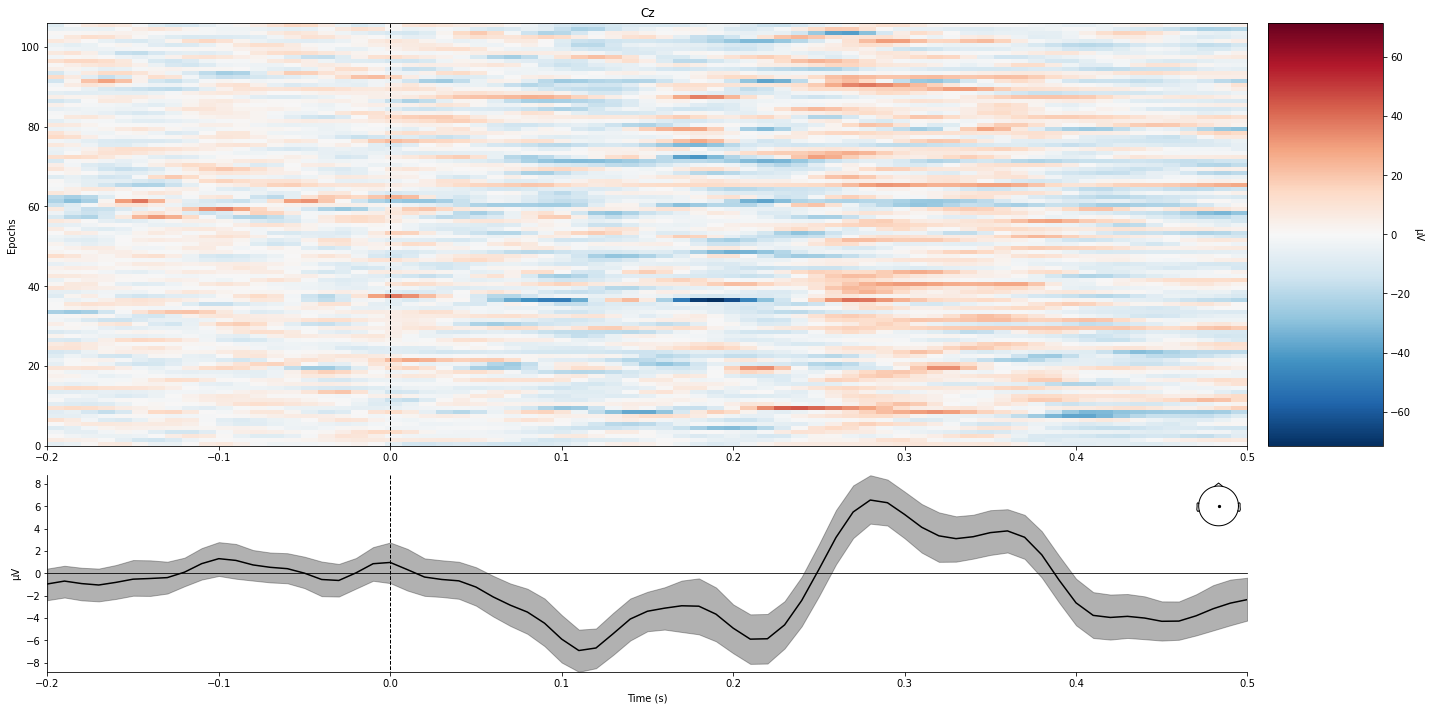

In [65]:
epochs['target'].plot_image(picks=[13]);

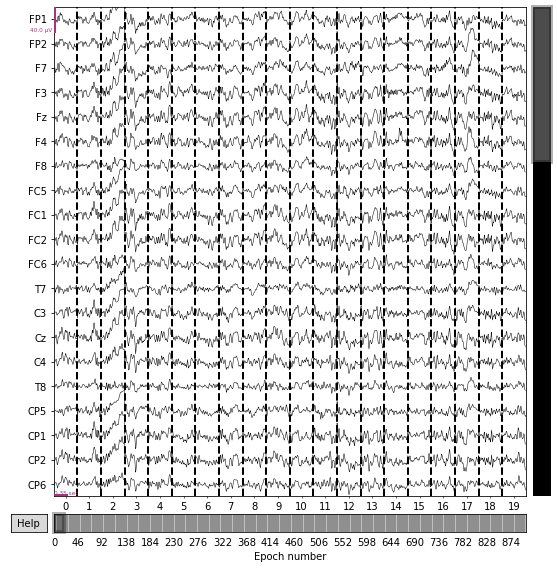

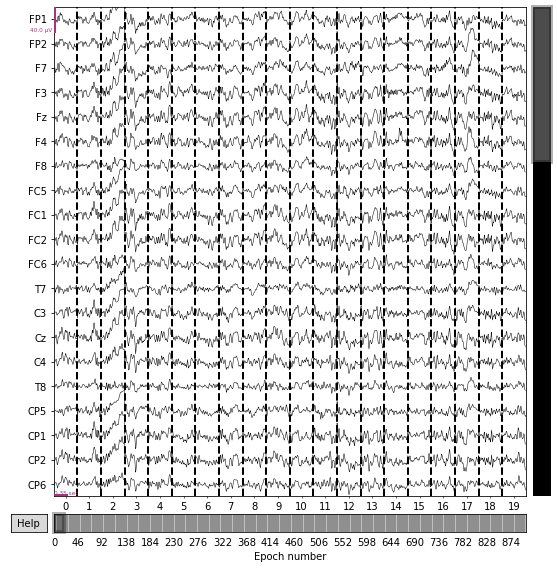

In [69]:
epochs.plot()

In [68]:
df = epochs.to_data_frame()
df.head(30)

,time,condition,epoch,FP1,FP2,F7,F3,Fz,F4,F8,...,P1,P2,P6,PO7,PO3,POz,PO4,PO8,STI 014,FCz
0,-0.20,standard/stimulus,0,-2.039214,1.596807,-8.504506,-0.648911,1.847494,0.002301,4.400670,...,-2.487713,-5.656993,-7.996294,-6.508858,-8.385799,-8.743836,-12.641754,-11.103863,0.0,2.309564
1,-0.19,standard/stimulus,0,-2.025091,0.478408,-7.347009,-0.445103,0.404879,-0.598656,2.955923,...,-4.617592,-6.560722,-5.409758,-5.289679,-8.521139,-9.444638,-10.892824,-6.296136,0.0,0.958599
2,-0.18,standard/stimulus,0,-0.405399,-0.654831,-1.751748,0.746717,-0.941821,-1.990903,0.049241,...,-3.091192,-3.726414,-0.365079,-2.108827,-3.827362,-4.661862,-4.086996,0.809993,0.0,-0.004128
3,-0.17,standard/stimulus,0,-0.880002,-3.164759,0.830055,0.037385,-3.088995,-4.198219,-3.350068,...,0.107011,0.148958,4.756944,1.665999,2.073609,1.411587,3.410441,7.115846,0.0,-1.690204
4,-0.16,standard/stimulus,0,-3.663629,-5.114798,-2.500606,-1.961367,-4.392978,-4.783511,-4.431462,...,2.253394,2.070538,6.442436,4.006568,4.741046,3.583941,5.994384,8.155458,0.0,-2.685915
5,-0.15,standard/stimulus,0,-5.214903,-3.486066,-6.637916,-2.185348,-2.940695,-1.992945,-1.614673,...,2.691062,1.796237,3.879447,3.608555,3.197050,0.947507,2.617444,3.075394,0.0,-1.070938
6,-0.14,standard/stimulus,0,-3.699487,0.628907,-6.133809,-0.169019,-0.273144,2.030088,2.908326,...,2.372459,1.121889,0.195416,1.104697,0.267560,-2.649068,-2.101311,-3.223920,0.0,1.588225
7,-0.13,standard/stimulus,0,-1.739651,2.334553,-2.452768,0.816610,-0.133484,3.123208,5.092248,...,1.835669,1.122603,-1.045051,-1.513492,-1.068746,-3.238676,-3.135725,-4.986932,0.0,1.233906
8,-0.12,standard/stimulus,0,-2.514642,-0.879106,-0.866114,-1.728205,-3.653532,-0.189928,3.243853,...,0.669077,0.902202,-0.042843,-2.727885,-0.770622,-1.054052,-0.604066,-2.136724,0.0,-3.561015
9,-0.11,standard/stimulus,0,-5.040671,-5.556778,-2.296950,-5.790415,-7.734746,-5.130752,-0.583258,...,-1.366105,-0.961057,-0.105374,-2.514281,-0.934061,0.186904,0.992378,0.161571,0.0,-9.405642


In [32]:
epochs.equalize_event_counts(event_ids)
epochs

Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

Number of events,212
Events,standard/stimulus: 106target/stimulus: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [33]:
epochs.save('oddball-epo.fif')

FileExistsError: Destination file exists. Please use option "overwrite=True" to force overwriting.

Если хотите увидеть более широкий разрез ЭЭГ по времени:

In [ ]:
epochs_for_tfr = mne.Epochs(raw, events, event_id=event_ids,
                            tmin=-.5, tmax=1.5, preload=True)

In [ ]:
epochs_for_tfr.plot();

In [ ]:
epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)

epochs_for_tfr.equalize_event_counts(event_ids);

epochs_for_tfr.save('oddball-long-epo.fif')